#PreProcessing


In [ ]:
import numpy as np
import pandas as pd

In [187]:
df = pd.read_csv("C:/Users/arshm/Downloads/dc-hackathon-24-25/train_dataset.csv")
test_df = pd.read_csv("C:/Users/arshm/Downloads/dc-hackathon-24-25/test_dataset.csv")

train_df = df.iloc[:,:-1]
train_df_target = df.iloc[:,-1:]
train_df = train_df.drop('ID',axis=1)
test_df = test_df.drop('ID',axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132193 entries, 0 to 132192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       132193 non-null  object 
 1   MinTemp        131613 non-null  float64
 2   MaxTemp        131893 non-null  float64
 3   Rainfall       130924 non-null  float64
 4   Evaporation    75676 non-null   float64
 5   Sunshine       69152 non-null   float64
 6   WindGustDir    123577 non-null  object 
 7   WindGustSpeed  123632 non-null  float64
 8   WindDir9am     122890 non-null  object 
 9   WindDir3pm     128698 non-null  object 
 10  WindSpeed9am   130948 non-null  float64
 11  WindSpeed3pm   129754 non-null  float64
 12  Humidity9am    130555 non-null  float64
 13  Humidity3pm    128847 non-null  float64
 14  Pressure9am    119154 non-null  float64
 15  Pressure3pm    119180 non-null  float64
 16  Cloud9am       82196 non-null   float64
 17  Cloud3pm       78926 non-null

In [189]:
angles = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315}

train_df['WindGustAngles'] = train_df['WindGustDir'].map(angles)
train_df['WindGustDir_x'] = np.cos(np.radians(train_df['WindGustAngles']))
train_df['WindGustDir_y'] = np.sin(np.radians(train_df['WindGustAngles']))
train_df.drop(columns=['WindGustAngles'], inplace=True)
train_df.drop(columns=['WindGustDir'], inplace=True)

train_df['WindDir9am_angles'] = train_df['WindDir9am'].map(angles)
train_df['WindDir9am_x'] = np.cos(np.radians(train_df['WindDir9am_angles']))
train_df['WindDir9am_y'] = np.sin(np.radians(train_df['WindDir9am_angles']))
train_df.drop(columns=['WindDir9am_angles'], inplace=True)
train_df.drop(columns=['WindDir9am'], inplace=True)

train_df['WindDir3pm_angles'] = train_df['WindDir3pm'].map(angles)
train_df['WindDir3pm_x'] = np.cos(np.radians(train_df['WindDir3pm_angles']))
train_df['WindDir3pm_y'] = np.sin(np.radians(train_df['WindDir3pm_angles']))
train_df.drop(columns=['WindDir3pm_angles'], inplace=True)
train_df.drop(columns=['WindDir3pm'], inplace=True)

train_df['RainToday'] = train_df['RainToday'].map({'No': 0, 'Yes': 1})

In [191]:
angles = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315}

test_df['WindGustAngles'] = test_df['WindGustDir'].map(angles)
test_df['WindGustDir_x'] = np.cos(np.radians(test_df['WindGustAngles']))
test_df['WindGustDir_y'] = np.sin(np.radians(test_df['WindGustAngles']))
test_df.drop(columns=['WindGustAngles'], inplace=True)
test_df.drop(columns=['WindGustDir'], inplace=True)

test_df['WindDir9am_angles'] = test_df['WindDir9am'].map(angles)
test_df['WindDir9am_x'] = np.cos(np.radians(test_df['WindDir9am_angles']))
test_df['WindDir9am_y'] = np.sin(np.radians(test_df['WindDir9am_angles']))
test_df.drop(columns=['WindDir9am_angles'], inplace=True)
test_df.drop(columns=['WindDir9am'], inplace=True)

test_df['WindDir3pm_angles'] = test_df['WindDir3pm'].map(angles)
test_df['WindDir3pm_x'] = np.cos(np.radians(test_df['WindDir3pm_angles']))
test_df['WindDir3pm_y'] = np.sin(np.radians(test_df['WindDir3pm_angles']))
test_df.drop(columns=['WindDir3pm_angles'], inplace=True)
test_df.drop(columns=['WindDir3pm'], inplace=True)

test_df['RainToday'] = test_df['RainToday'].map({'No': 0, 'Yes': 1})

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

vectorizer = CountVectorizer()
X_text_train = vectorizer.fit_transform(train_df['Location'])
X_text_test = vectorizer.transform(test_df['Location'])
X_num_train = train_df.drop('Location',axis=1)
X_num_test = test_df.drop('Location',axis=1)


# scaler = MinMaxScaler()
# X_num_train = scaler.fit_transform(X_num_train)
# X_num_test = scaler.transform(X_num_test)

train_df = hstack([X_text_train, X_num_train])
test_df = hstack([X_text_test, X_num_test])

In [57]:
# train_df_encoded = pd.get_dummies(train_df, columns=['Location'])
# test_df_encoded = pd.get_dummies(test_df, columns=['Location'])

In [195]:
train_df = train_df_encoded.astype('float')
test_df = test_df_encoded.astype('float')

Tree-based models (e.g., Random Forest, Gradient Boosting) handle higher-dimensional data well and can determine feature importance effectively.

In [197]:
train_df = train_df.apply(lambda col: col.fillna(col.mode()[0]) if col.isna().any() else col)
test_df = test_df.apply(lambda col: col.fillna(col.mode()[0]) if col.isna().any() else col)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_df, train_df_target = smote.fit_resample(train_df, train_df_target)

In [199]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
train_df, train_df_target = smote_enn.fit_resample(train_df, train_df_target)

In [167]:
train_df_target.value_counts()

RainTomorrow
1               99185
0               67197
Name: count, dtype: int64

In [169]:
train_df_target.skew().sort_values(ascending=False)

RainTomorrow   -0.391826
dtype: float64

In [213]:
X = train_df
y = train_df_target.values
y = y.flatten()
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,19.4,25.2,0.0,4.0,0.0,54.0,24.0,37.0,64.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8.3,22.1,0.0,3.2,9.8,26.0,7.0,11.0,75.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.8,18.1,0.2,4.0,0.0,11.0,4.0,6.0,97.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,20.6,0.6,4.0,0.0,31.0,7.0,20.0,59.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.9,23.0,0.0,4.0,0.0,35.0,7.0,20.0,66.0,28.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
#GAUSSIAN NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

# Make predictions
y_pred = gnb.predict(test_df)

In [141]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X,y)

y_pred = classifier.predict(test_df)

In [179]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt.fit(X, y)
y_pred = dt.predict(test_df)

In [ ]:
#MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X, y)

y_pred = nb.predict(test_df)

In [207]:
#final cell to save the submission file. 
test_df_1 = pd.read_csv("C:/Users/arshm/Downloads/dc-hackathon-24-25/test_dataset.csv")
submission_df = pd.DataFrame({
    'ID': test_df_1['ID'],  # Extract the ID column from test data
    'RainTomorrow': y_pred  # Predictions from the model
})
submission_df.to_csv('submission.csv', index=False)

In [1]:
import torch

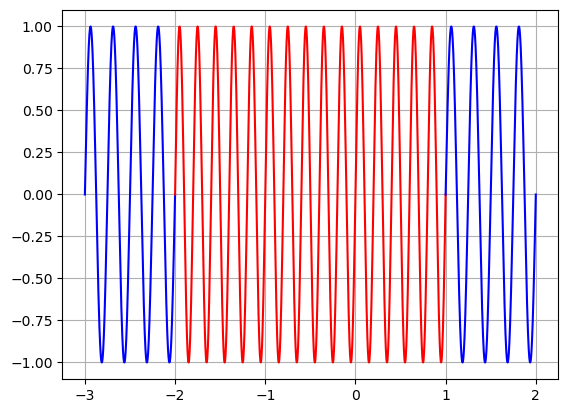

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(-3,-2,1000)
x2 = np.linspace(-2,1,1000)
x3 = np.linspace(1,2,1000)

y1 = np.sin(8*np.pi*x1)
y2 = np.sin(10*np.pi*x2)
y3 = np.sin(8*np.pi*x3)

plt.figure()
plt.grid()
plt.plot(x1,y1,color='blue')
plt.plot(x2,y2,color='red')
plt.plot(x3,y3,color='blue')
plt.show()